In [27]:
from glob import glob
import os
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt

## Preprocessing

In [2]:
all_file_path = glob('signaldataset/*.edf')
print(len(all_file_path))

28


In [3]:
all_file_path[0]

'signaldataset\\h01.edf'

In [5]:
healthy_file_path = [i for i in all_file_path if 'h' in i.split('\\')[1]]
patient_file_path = [i for i in all_file_path if 's' in i.split('\\')[1]]

print(len(healthy_file_path), len(patient_file_path))

14 14


### visualization example

Extracting EDF parameters from G:\Thesis_Papers\EEG_Based_Code_Practice\signaldataset\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152499  =      0.000 ...   609.996 secs...


C:\Users\DELL\AppData\Local\Temp\ipykernel_13928\3697826399.py:2: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


Using matplotlib as 2D backend.


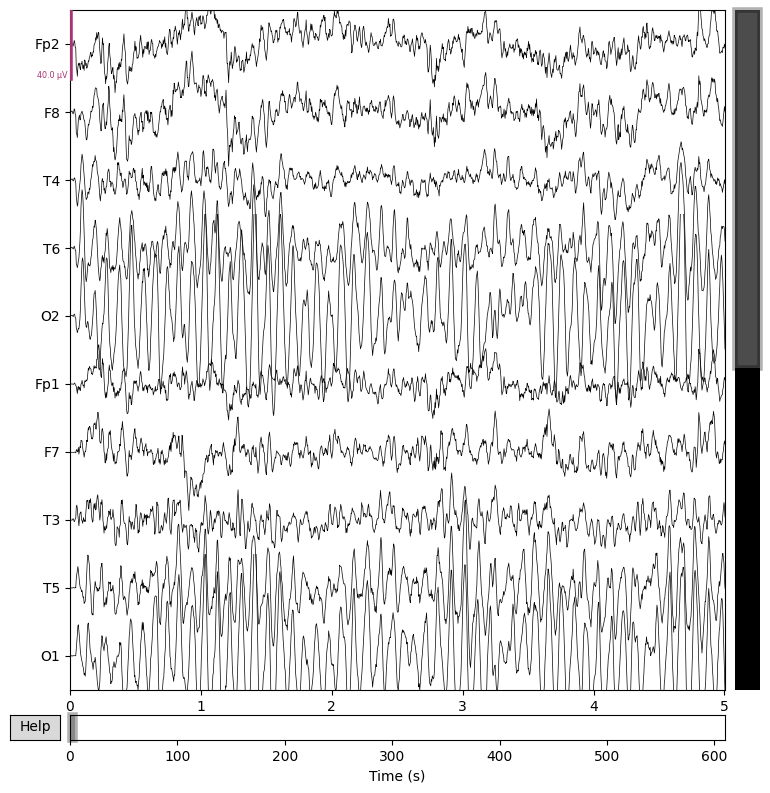

In [28]:
def visualize_raw_signal(file_path):
    raw_data = mne.io.read_raw_edf(file_path, preload=True)
    raw_data.plot(n_channels=10, duration=5, title='Raw EEG Signal')
visualize_raw_signal(healthy_file_path[0])


Extracting EDF parameters from G:\Thesis_Papers\EEG_Based_Code_Practice\signaldataset\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152499  =      0.000 ...   609.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\DELL\AppData\Local\Temp\ipykernel_13928\2337497956.py:2: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


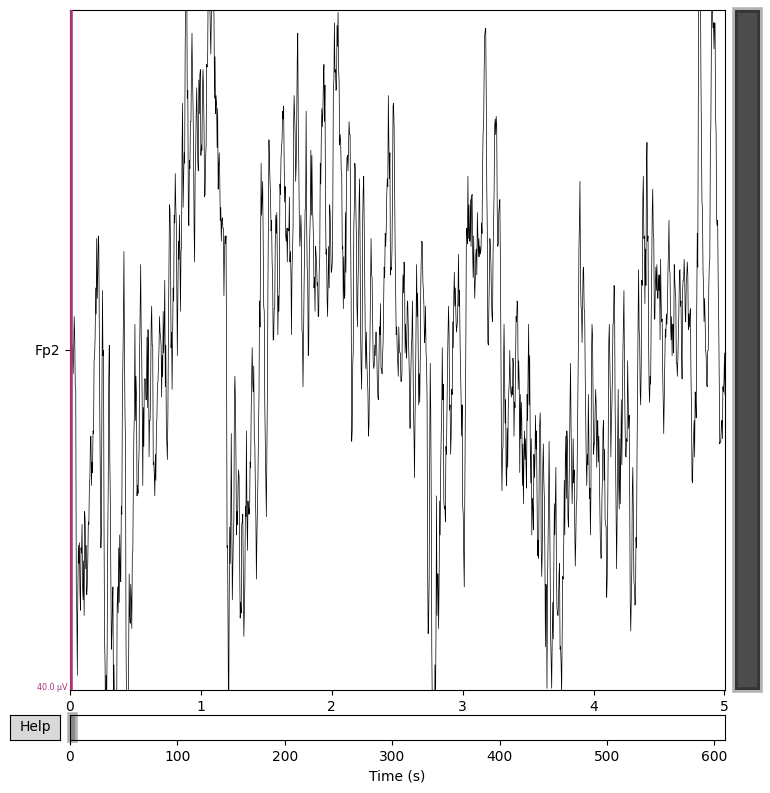

In [30]:
def visualize_raw_fp2(file_path):
    raw_data = mne.io.read_raw_edf(file_path, preload=True)
    raw_data.pick_channels(['Fp2'])  # Select only the 'Fp2' channel
    raw_data.plot(duration=5, title='Raw EEG Signal - Fp2')

# Example usage:
visualize_raw_fp2(healthy_file_path[0])

Extracting EDF parameters from G:\Thesis_Papers\EEG_Based_Code_Practice\signaldataset\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152499  =      0.000 ...   609.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\DELL\AppData\Local\Temp\ipykernel_13928\1330269594.py:5: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


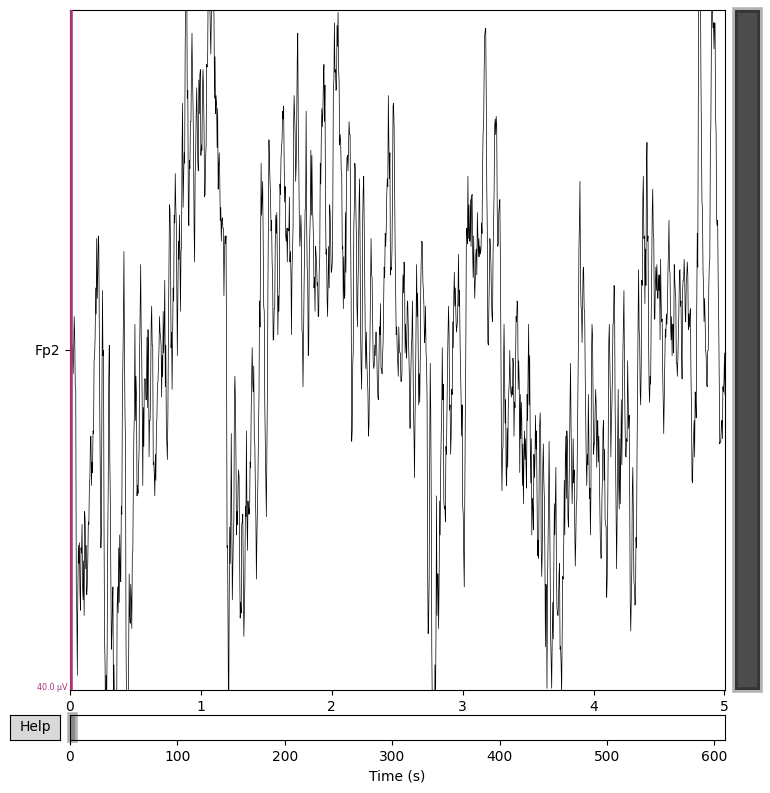

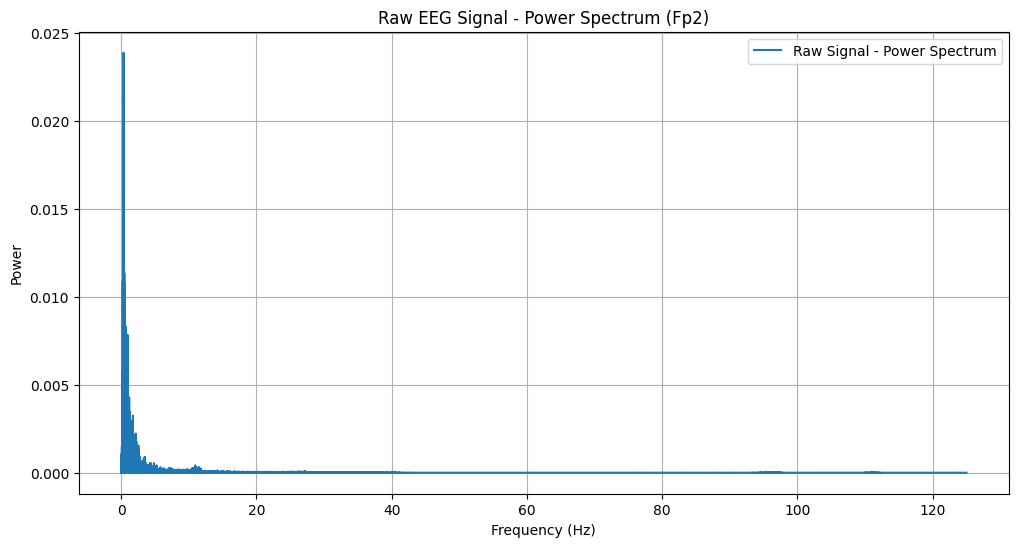

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_raw_fp2(file_path):
    raw_data = mne.io.read_raw_edf(file_path, preload=True)
    raw_data.pick_channels(['Fp2'])  # Select only the 'Fp2' channel
    
    # Plot the raw EEG signal
    raw_data.plot(duration=5, title='Raw EEG Signal - Fp2')
    
    # Extract data and sampling frequency
    raw_signal, times = raw_data[:, :]
    sfreq = raw_data.info['sfreq']
    
    # Perform FFT on the raw signal
    raw_fft = np.fft.rfft(raw_signal[0])  # Perform FFT on the first (and only) channel
    freqs = np.fft.rfftfreq(len(raw_signal[0]), d=1/sfreq)
    
    # Plot Power Spectral Density (PSD) for the raw signal
    plt.figure(figsize=(12, 6))
    plt.plot(freqs, np.abs(raw_fft)**2, label='Raw Signal - Power Spectrum')
    plt.title('Raw EEG Signal - Power Spectrum (Fp2)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage:
visualize_raw_fp2(healthy_file_path[0])

Extracting EDF parameters from G:\Thesis_Papers\EEG_Based_Code_Practice\signaldataset\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152499  =      0.000 ...   609.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)



C:\Users\DELL\AppData\Local\Temp\ipykernel_13928\3436538095.py:2: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


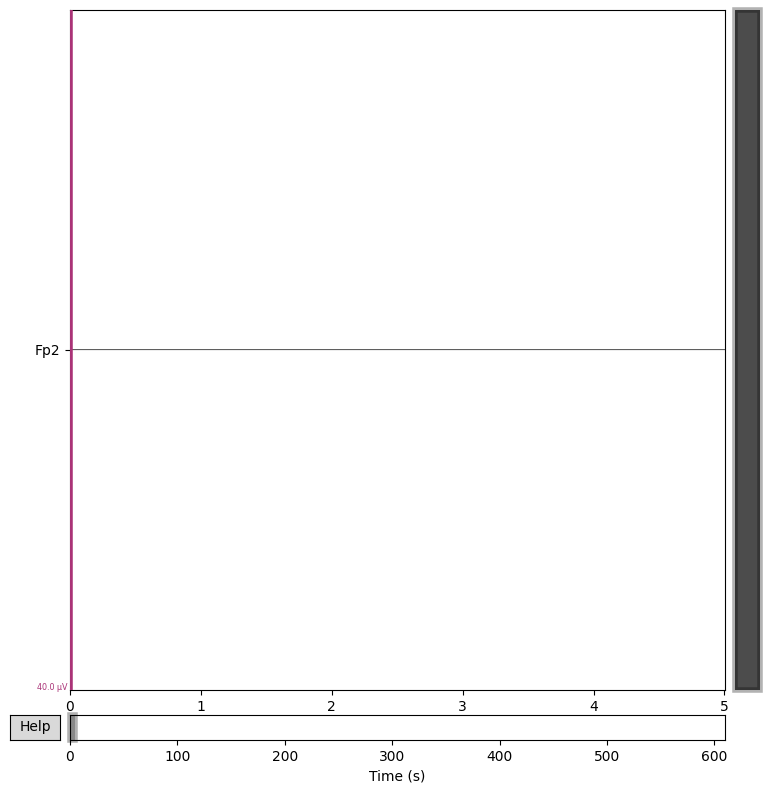

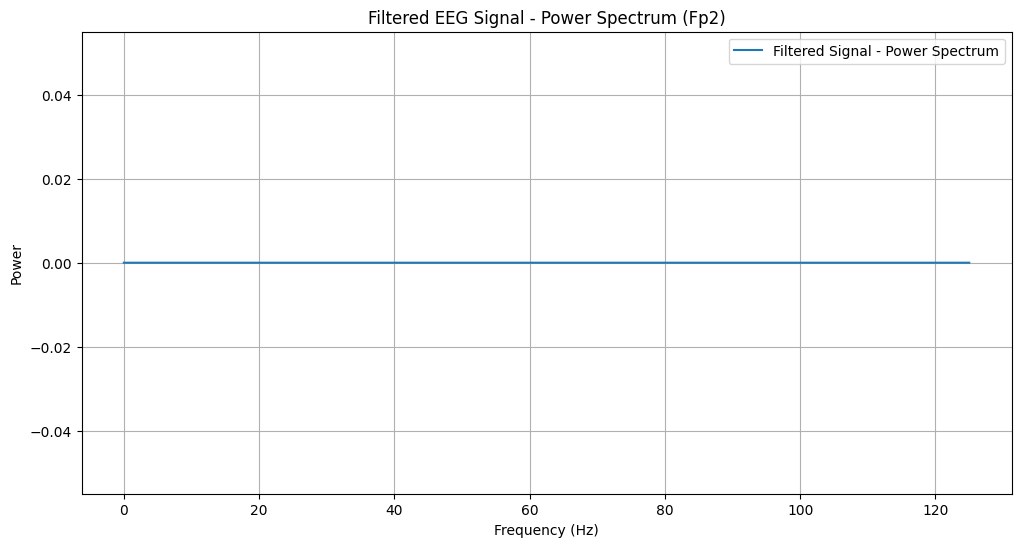

In [34]:
def visualize_filtered_fp2(file_path):
    raw_data = mne.io.read_raw_edf(file_path, preload=True)
    raw_data.pick_channels(['Fp2'])  # Select only the 'Fp2' channel
    raw_data.set_eeg_reference()
    raw_data.filter(l_freq=0.5, h_freq=45)
    
    # Plot the filtered EEG signal
    raw_data.plot(duration=5, title='Filtered EEG Signal - Fp2')
    
    # Extract data and sampling frequency
    filtered_signal, times = raw_data[:, :]
    sfreq = raw_data.info['sfreq']
    
    # Perform FFT on the filtered signal
    filtered_fft = np.fft.rfft(filtered_signal[0])  # Perform FFT on the first (and only) channel
    freqs = np.fft.rfftfreq(len(filtered_signal[0]), d=1/sfreq)
    
    # Plot Power Spectral Density (PSD) for the filtered signal
    plt.figure(figsize=(12, 6))
    plt.plot(freqs, np.abs(filtered_fft)**2, label='Filtered Signal - Power Spectrum')
    plt.title('Filtered EEG Signal - Power Spectrum (Fp2)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.grid()
    plt.legend()
    plt.show()

# Example usage:
visualize_filtered_fp2(healthy_file_path[0])

In [7]:
def read_data(file_path):
    data = mne.io.read_raw_edf(file_path, preload = True)
    data.set_eeg_reference()
    data.filter(l_freq = 0.5, h_freq = 45)
    epochs = mne.make_fixed_length_epochs(data, duration = 5, overlap = 1)
    array = epochs.get_data()
    return array

In [8]:
sample_data = read_data(healthy_file_path[0])

Extracting EDF parameters from G:\Thesis_Papers\EEG_Based_Code_Practice\signaldataset\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152499  =      0.000 ...   609.996 secs...


C:\Users\DELL\AppData\Local\Temp\ipykernel_13928\1427827665.py:2: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  data = mne.io.read_raw_edf(file_path, preload = True)


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)

Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 152 events and 1250 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


Extracting EDF parameters from G:\Thesis_Papers\EEG_Based_Code_Practice\signaldataset\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152499  =      0.000 ...   609.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)



C:\Users\DELL\AppData\Local\Temp\ipykernel_13928\122572656.py:2: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  data = mne.io.read_raw_edf(file_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


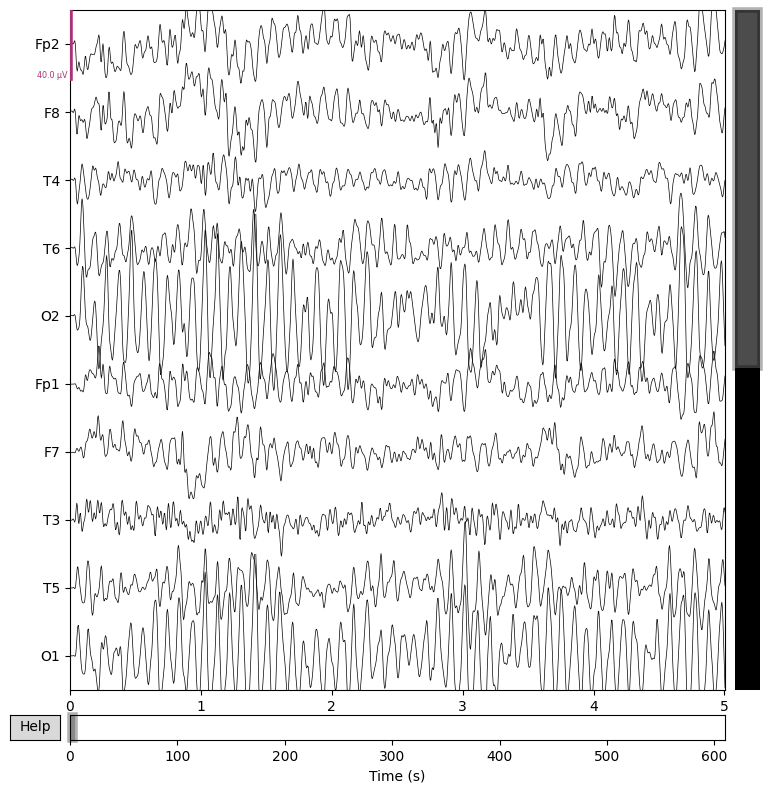

Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 152 events and 1250 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 10 events and 1250 original time points ...


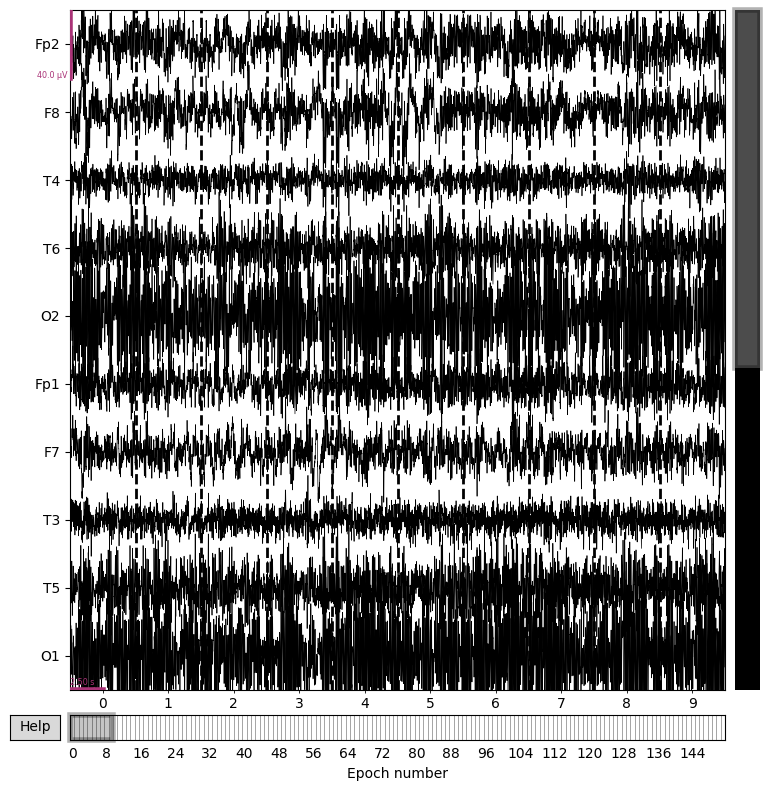

In [29]:
def visualize_preprocessed_signal(file_path):
    data = mne.io.read_raw_edf(file_path, preload=True)
    data.set_eeg_reference()
    data.filter(l_freq=0.5, h_freq=45)
    
    # Visualize the preprocessed raw signal
    data.plot(n_channels=10, duration=5, title='Preprocessed EEG Signal (Raw)')
    
    # Creating epochs for visualization
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=1)
    
    # Visualize the epochs
    epochs.plot(n_channels=10, n_epochs=10, title='Preprocessed EEG Signal (Epochs)')


visualize_preprocessed_signal(healthy_file_path[0])


Extracting EDF parameters from G:\Thesis_Papers\EEG_Based_Code_Practice\signaldataset\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152499  =      0.000 ...   609.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)



C:\Users\DELL\AppData\Local\Temp\ipykernel_13928\479746264.py:2: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  data = mne.io.read_raw_edf(file_path, preload=True)


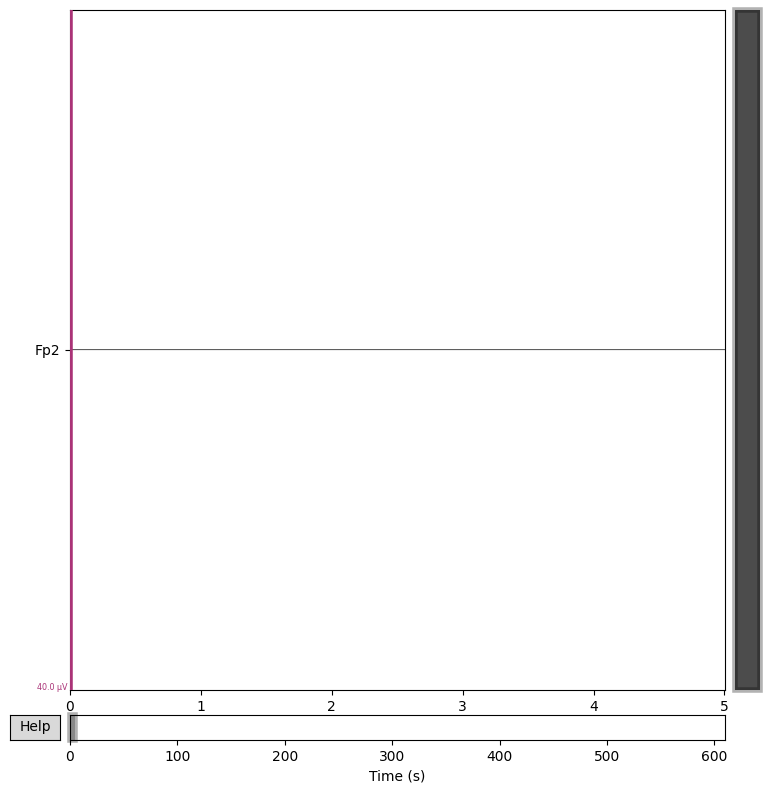

Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 152 events and 1250 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 10 events and 1250 original time points ...


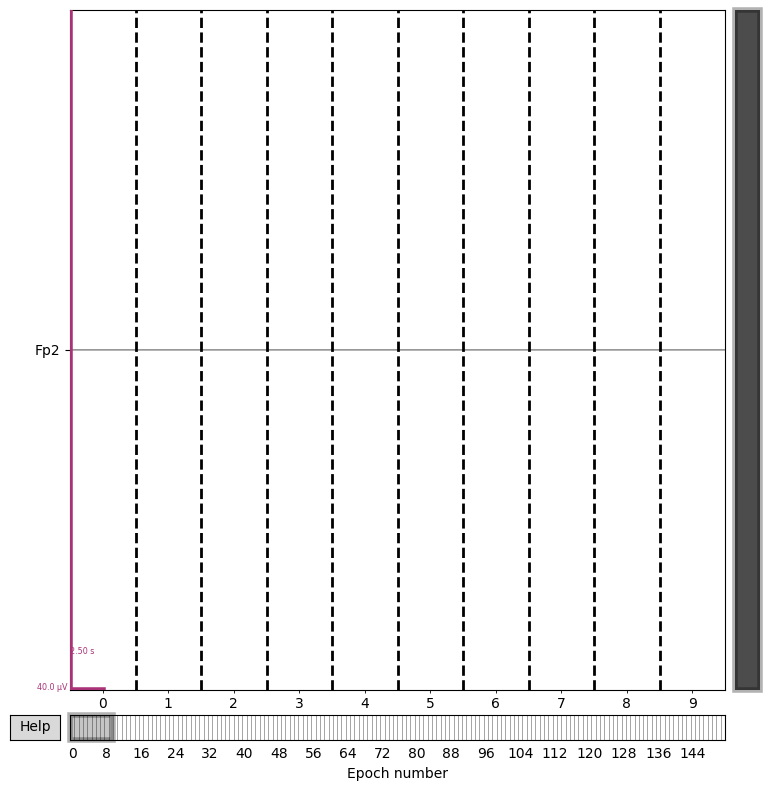

In [31]:
def visualize_preprocessed_fp2(file_path):
    data = mne.io.read_raw_edf(file_path, preload=True)
    data.pick_channels(['Fp2'])  # Select only the 'Fp2' channel
    data.set_eeg_reference()
    data.filter(l_freq=0.5, h_freq=45)
    
    # Visualize the preprocessed raw signal
    data.plot(duration=5, title='Preprocessed EEG Signal - Fp2 (Raw)')
    
    # Creating epochs for visualization
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=1)
    
    # Visualize the epochs
    epochs.plot(n_epochs=10, title='Preprocessed EEG Signal - Fp2 (Epochs)')

# Example usage:
visualize_preprocessed_fp2(healthy_file_path[0])

Extracting EDF parameters from G:\Thesis_Papers\EEG_Based_Code_Practice\signaldataset\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152499  =      0.000 ...   609.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\DELL\AppData\Local\Temp\ipykernel_13928\3205806763.py:3: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw_data = mne.io.read_raw_edf(file_path, preload=True)


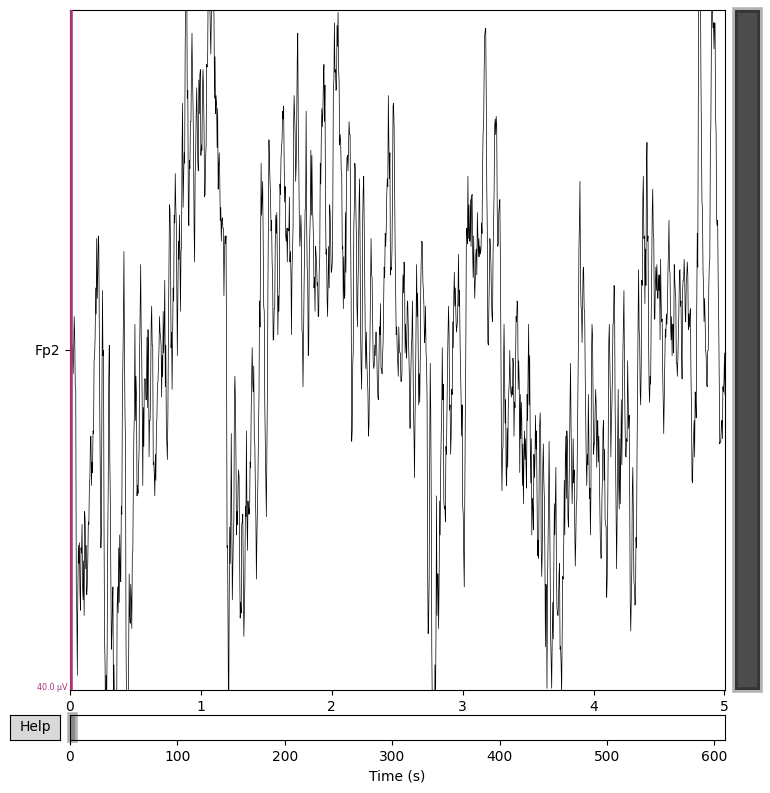

Extracting EDF parameters from G:\Thesis_Papers\EEG_Based_Code_Practice\signaldataset\h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 152499  =      0.000 ...   609.996 secs...
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (6.604 s)



C:\Users\DELL\AppData\Local\Temp\ipykernel_13928\3205806763.py:8: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  data = mne.io.read_raw_edf(file_path, preload=True)


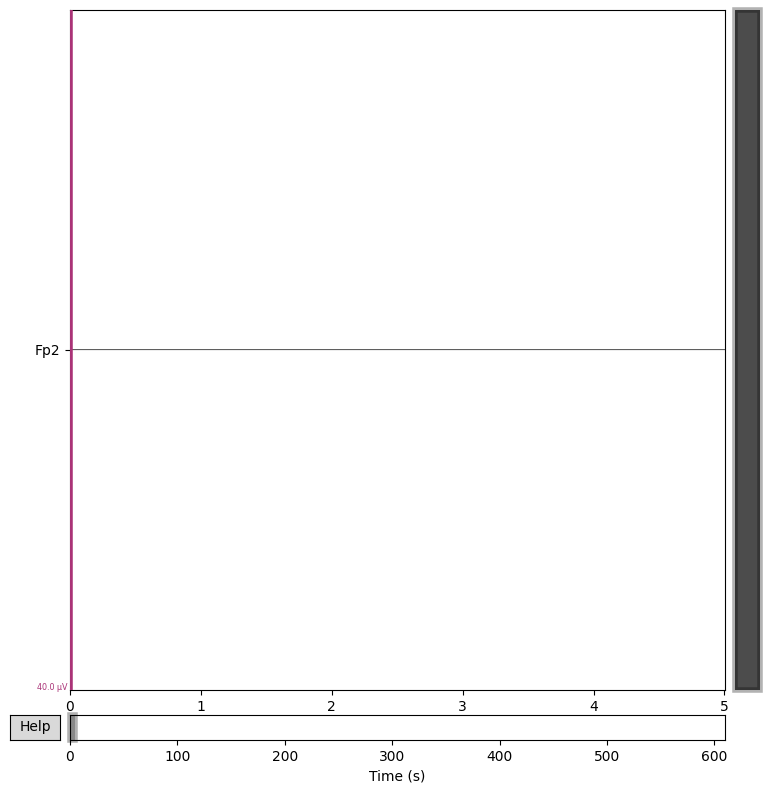

Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 152 events and 1250 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 10 events and 1250 original time points ...


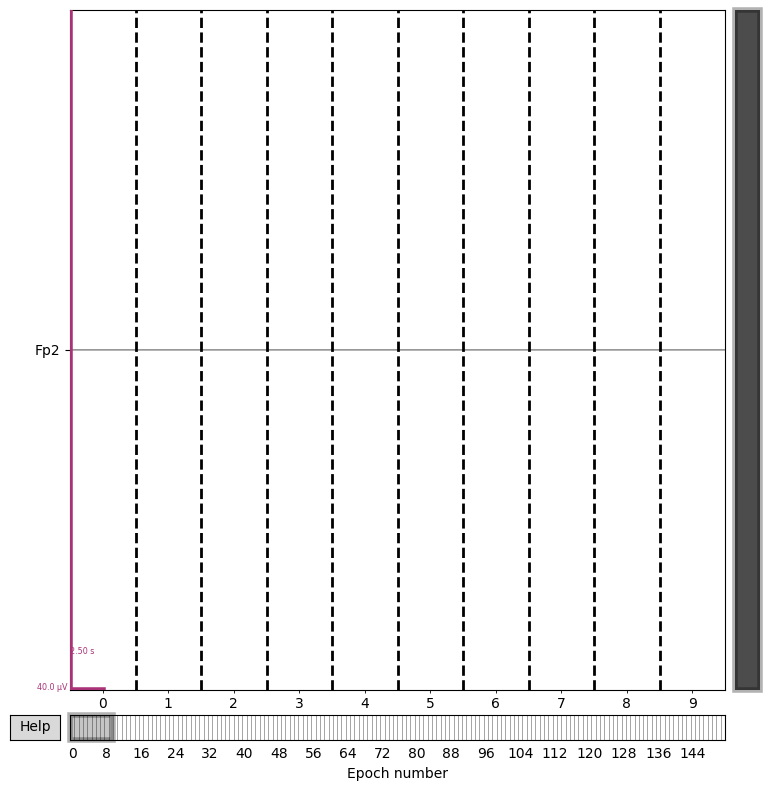

In [32]:
def compare_fp2_visualization(file_path):
    # Visualize raw signal
    raw_data = mne.io.read_raw_edf(file_path, preload=True)
    raw_data.pick_channels(['Fp2'])
    raw_data.plot(duration=5, title='Raw EEG Signal - Fp2')
    
    # Preprocess and visualize
    data = mne.io.read_raw_edf(file_path, preload=True)
    data.pick_channels(['Fp2'])
    data.set_eeg_reference()
    data.filter(l_freq=0.5, h_freq=45)
    data.plot(duration=5, title='Preprocessed EEG Signal - Fp2 (Raw)')
    
    # Epoch and visualize
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=1)
    epochs.plot(n_epochs=10, title='Preprocessed EEG Signal - Fp2 (Epochs)')

# Example usage:
compare_fp2_visualization(healthy_file_path[0])


In [9]:
sample_data.shape #no of epochs, channels, length of signal

(152, 19, 1250)

In [10]:
%%capture
control_epochs_array = [read_data(i) for i in healthy_file_path]
patient_epochs_array = [read_data(i) for i in patient_file_path]

In [11]:
control_epochs_array[0].shape

(152, 19, 1250)

In [12]:
control_epoch_labels = [len(i)*[0] for i in control_epochs_array]
patient_epoch_labels = [len(i)*[1] for i in patient_epochs_array]

In [13]:
data_list = control_epochs_array + patient_epochs_array
label_list = control_epoch_labels + patient_epoch_labels

In [14]:
group_list = [[i]*len(j) for i,j in enumerate(data_list)]
len(group_list)

28

In [15]:
#convert list to array

data_array = np.vstack(data_list)
label_array = np.hstack(label_list)
group_array = np.hstack(group_list)

print(data_array.shape, label_array.shape, group_array.shape)

(5447, 19, 1250) (5447,) (5447,)


https://scipython.com/book/chapter-6-numpy/examples/vstack-and-hstack/

## Extract Features 

In [16]:
#to extract one feature the shape should be 5447,19
#to extract n number of feature then shape will be 5447,19*n

np.mean(data_array, axis = -1).shape

(5447, 19)

In [17]:
from scipy import stats

https://docs.scipy.org/doc/scipy/reference/stats.html

In [19]:
def mean(x):
    return np.mean(x, axis = -1)
def std(x):
    return np.std(x, axis = -1)
def ptp(x):
    return np.ptp(x, axis = -1)
def var(x):
    return np.var(x, axis = -1)
def minim(x):
    return np.min(x, axis = -1)
def maxim(x):
    return np.max(x, axis = -1)
def argminim(x):
    return np.argmin(x, axis = -1)
def argmaxim(x):
    return np.argmax(x, axis = -1)
def rms(x):
    return np.sqrt(np.mean(x**2, axis = -1))
def abs_diff_signal(x):
    return np.sum(np.abs(np.diff(x, axis = -1)), axis = -1)
def skewness(x):
    return stats.skew(x, axis = -1)
def kurtosis(x):
    return stats.kurtosis(x, axis = -1)
def conc_features(x):
    return np.concatenate((mean(x),std(x),ptp(x),var(x),minim(x),maxim(x),argminim(x),argmaxim(x),
                          rms(x),abs_diff_signal(x),skewness(x),kurtosis(x)), axis = -1)

In [21]:
features = []
for d in data_array:
    features.append(conc_features(d))

In [22]:
features_array = np.array(features)
features_array.shape

(5447, 228)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, GridSearchCV

In [25]:
clf = LogisticRegression()
gkf = GroupKFold(5)
pipe = Pipeline([('scaler',StandardScaler()), ('clf', clf)])

param_grid = {'clf__C': [0.2, 0.5, 0.7, 1, 4,5,7]}
gscv = GridSearchCV(pipe, param_grid, cv = gkf, n_jobs = 12)
gscv.fit(features_array, label_array, groups = group_array)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=GroupKFold(n_splits=5),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             n_jobs=12, param_grid={'clf__C': [0.2, 0.5, 0.7, 1, 4, 5, 7]})

In [26]:
gscv.best_score_

0.7345030733730609